In [1]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = az.from_netcdf('trace/pk_mixed_model.NC')

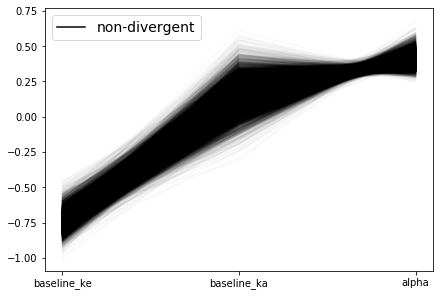

In [3]:
az.plot_parallel(data, var_names=['baseline_ke','baseline_ka','alpha'])

In [9]:
data

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data